<a href="https://colab.research.google.com/github/dangogit/ML_HW3/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz

--2022-06-25 06:26:37--  https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344862509 (329M) [application/x-gzip]
Saving to: ‘102flowers.tgz’

102flowers.tgz      100%[===================>] 328.89M  20.8MB/s    in 17s     

2022-06-25 06:26:55 (19.6 MB/s) - ‘102flowers.tgz’ saved [344862509/344862509]



In [2]:
!mkdir 'input'

In [5]:
!tar -xvf  '102flowers.tgz' -C 'input'

Streaming output truncated to the last 5000 lines.
jpg/image_02266.jpg
jpg/image_00062.jpg
jpg/image_05821.jpg
jpg/image_03712.jpg
jpg/image_01142.jpg
jpg/image_03033.jpg
jpg/image_05760.jpg
jpg/image_02732.jpg
jpg/image_00183.jpg
jpg/image_05264.jpg
jpg/image_03778.jpg
jpg/image_07061.jpg
jpg/image_04468.jpg
jpg/image_00676.jpg
jpg/image_07610.jpg
jpg/image_02192.jpg
jpg/image_05112.jpg
jpg/image_05638.jpg
jpg/image_00053.jpg
jpg/image_02451.jpg
jpg/image_05857.jpg
jpg/image_08033.jpg
jpg/image_03902.jpg
jpg/image_07494.jpg
jpg/image_02357.jpg
jpg/image_05496.jpg
jpg/image_04496.jpg
jpg/image_07538.jpg
jpg/image_01801.jpg
jpg/image_00326.jpg
jpg/image_07644.jpg
jpg/image_01199.jpg
jpg/image_01168.jpg
jpg/image_07020.jpg
jpg/image_05006.jpg
jpg/image_03484.jpg
jpg/image_02825.jpg
jpg/image_04549.jpg
jpg/image_02011.jpg
jpg/image_04360.jpg
jpg/image_06847.jpg
jpg/image_07695.jpg
jpg/image_03540.jpg
jpg/image_08058.jpg
jpg/image_01230.jpg
jpg/image_00096.jpg
jpg/image_01517.jpg
jpg/image

In [6]:
!pip install split-folders
import splitfolders # or import splitfolders
input_folder = "input"
output = "splited_jpg" #where you want the split datasets saved. one will be created if it does not exist or none is set

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.5, .25, .25)) # ratio of split are in order of train/val/test. You can change to whatever you want. For train/val sets only, you could do .75, .25 for example.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 8189 files [00:01, 4260.38 files/s]


In [7]:
import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

In [8]:
base_dir = 'splited_jpg'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [9]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [10]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(validation_dir,  batch_size = 20, class_mode = 'binary', target_size = (224, 224))

# Flow test images in batches of 20 using test_datagen generator
test_generator = test_datagen.flow_from_directory(test_dir,  batch_size = 20, class_mode = 'binary', target_size = (224, 224))

Found 4094 images belonging to 1 classes.
Found 2047 images belonging to 1 classes.
Found 2048 images belonging to 1 classes.


Very Deep Convolutional Networks for Large-Scale Image Recognition(VGG-16)

In [11]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

58900480/58889256 [==============================] - 0s 0us/step


In [12]:
for layer in base_model.layers:
    layer.trainable = False

In [13]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.Adam(1e-4), loss = tf.keras.losses.BinaryCrossentropy(),metrics = ['acc', tf.keras.metrics.BinaryAccuracy()])

In [14]:
vgghist = model.fit(train_generator, validation_data=validation_generator, steps_per_epoch=10, epochs=10, workers=10, use_multiprocessing=True)


Epoch 1/10
10/10 [==============================] - 1081s 119s/step - loss: 0.0614 - acc: 0.9550 - binary_accuracy: 0.9550 - val_loss: 5.5543e-09 - val_acc: 1.0000 - val_binary_accuracy: 1.0000
Epoch 2/10
10/10 [==============================] - 1028s 113s/step - loss: 2.8162e-09 - acc: 1.0000 - binary_accuracy: 1.0000 - val_loss: 7.4030e-11 - val_acc: 1.0000 - val_binary_accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 1081s 118s/step - loss: 9.1878e-11 - acc: 1.0000 - binary_accuracy: 1.0000 - val_loss: 1.4855e-11 - val_acc: 1.0000 - val_binary_accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 1032s 113s/step - loss: 1.0472e-10 - acc: 1.0000 - binary_accuracy: 1.0000 - val_loss: 7.9466e-12 - val_acc: 1.0000 - val_binary_accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 1087s 118s/step - loss: 1.3180e-11 - acc: 1.0000 - binary_accuracy: 1.0000 - val_loss: 6.2316e-12 - val_acc: 1.0000 - val_binary_accuracy: 1.0000
Epoch 6/10
10/

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
model.evaluate(test_generator,use_multiprocessing=True,workers=10)

103/103 [==============================] - 934s 9s/step - loss: 5.5444e-12 - acc: 1.0000 - binary_accuracy: 1.0000


[5.544432534615451e-12, 1.0, 1.0]

Inception

In [36]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model2 = InceptionV3(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

In [37]:
for layer in base_model2.layers:
    layer.trainable = False

In [38]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(base_model2.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

model2 = tf.keras.models.Model(base_model2.input, x)
#RMSprop(lr=0.0001)
model2.compile(optimizer = tf.keras.optimizers.Adam(1e-4), loss = tf.keras.losses.BinaryCrossentropy(),metrics = ['acc', tf.keras.metrics.BinaryAccuracy()])

In [39]:
inc_history = model2.fit_generator(train_generator, validation_data=validation_generator, steps_per_epoch=100, epochs=10, workers=10, use_multiprocessing=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
100/100 [==============================] - 548s 5s/step - loss: 0.0066 - acc: 0.9950 - binary_accuracy: 0.9950 - val_loss: 0.0000e+00 - val_acc: 1.0000 - val_binary_accuracy: 1.0000
Epoch 2/10
100/100 [==============================] - 541s 5s/step - loss: 0.0000e+00 - acc: 1.0000 - binary_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000 - val_binary_accuracy: 1.0000
Epoch 3/10
100/100 [==============================] - 537s 5s/step - loss: 0.0000e+00 - acc: 1.0000 - binary_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000 - val_binary_accuracy: 1.0000
Epoch 4/10
100/100 [==============================] - 512s 5s/step - loss: 0.0000e+00 - acc: 1.0000 - binary_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000 - val_binary_accuracy: 1.0000
Epoch 5/10
100/100 [==============================] - 542s 5s/step - loss: 0.0000e+00 - acc: 1.0000 - binary_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000 - val_binary_accuracy: 1.0000
Epoch 6/10
100/100 

In [48]:
model2.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

In [47]:
model2.evaluate(test_generator,use_multiprocessing=True,workers=10)

103/103 [==============================] - 242s 2s/step - loss: 0.0000e+00 - acc: 1.0000 - binary_accuracy: 1.0000


[0.0, 1.0, 1.0]

Results graphs

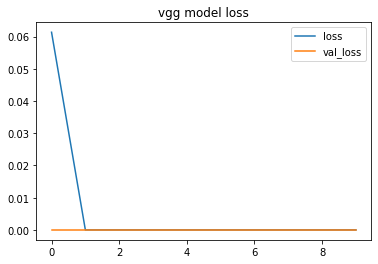

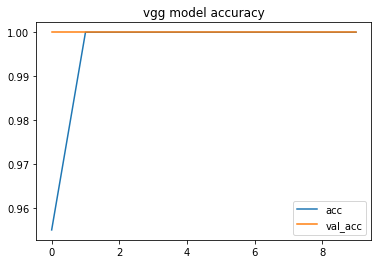

In [18]:
#Some visualizations
import matplotlib.pyplot as plt
#Loss
plt.plot(vgghist.history['loss'],label='loss')
plt.plot(vgghist.history['val_loss'],label='val_loss')
plt.title('vgg model loss')
plt.legend()
plt.show()
#Accuracy
plt.plot(vgghist.history['acc'],label='acc')
plt.plot(vgghist.history['val_acc'],label='val_acc')
plt.legend()
plt.title('vgg model accuracy')
plt.show()

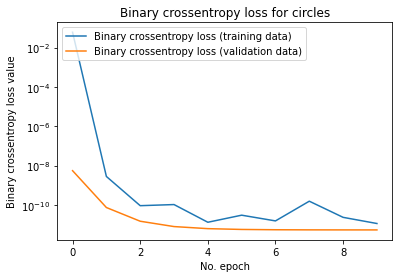

In [19]:
# Visualize training process
plt.plot(vgghist.history['loss'], label='Binary crossentropy loss (training data)')
plt.plot(vgghist.history['val_loss'], label='Binary crossentropy loss (validation data)')
plt.title('Binary crossentropy loss for circles')
plt.ylabel('Binary crossentropy loss value')
plt.yscale('log')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

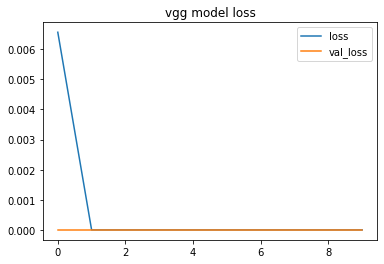

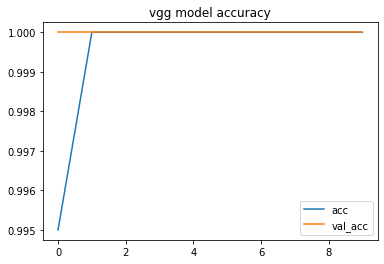

In [45]:
#Some visualizations
import matplotlib.pyplot as plt
#Loss
plt.plot(inc_history.history['loss'],label='loss')
plt.plot(inc_history.history['val_loss'],label='val_loss')
plt.title('vgg model loss')
plt.legend()
plt.show()
#Accuracy
plt.plot(inc_history.history['acc'],label='acc')
plt.plot(inc_history.history['val_acc'],label='val_acc')
plt.legend()
plt.title('vgg model accuracy')
plt.show()

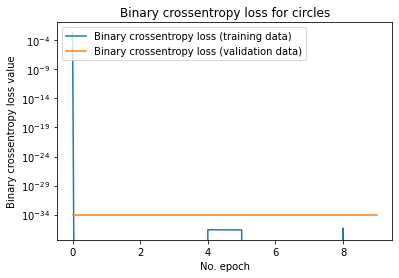

In [20]:
# Visualize training process
plt.plot(inc_history.history['loss'], label='Binary crossentropy loss (training data)')
plt.plot(inc_history.history['val_loss'], label='Binary crossentropy loss (validation data)')
plt.title('Binary crossentropy loss for circles')
plt.ylabel('Binary crossentropy loss value')
plt.yscale('log')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()